Загружаем и предобрабатываем данные

In [12]:
import pandas as pd

data = pd.read_csv('PsyHack_RUDN_train.csv', sep='\t')
data.head(10)

,ID,label,text
0,307,Non-depression,С детства я люблю футбол. Самые теплые воспоми...
1,243,Non-depression,Каждому человеку нужен мир. Мир- это весь земн...
2,73,Non-depression,"Я, другие и мир. Да, именно в таком порядке ме..."
3,301,Non-depression,Позиционирование себя как полноценного человек...
4,60,Non-depression,"Я, другие и мир. Такая неопределенная тема. Мы..."
5,128,Non-depression,К каждому человеку я отношусь изначально позит...
6,157,Depression,"«Я, другие, мир».Все меняется в этом мире. Мен..."
7,294,Depression,"Приветсвую, меня зовут Никита. Мне 20 полных л..."
8,67,Non-depression,В данном эссе я попытаюсь дать оценку своему х...
9,117,Non-depression,"Как много всего нас окружает, и как мало мы за..."


## Подготовка текста

In [13]:
import pymorphy2, re

In [14]:
morph = pymorphy2.MorphAnalyzer()

In [105]:
def normy_text(text):
    new_text = ''
    grams_exclusion = {'PREP', 'CONJ', 'INTJ', 'Name', 'Surn', 'Patr', 'Orgn', 'Trad'}
#     grams_exclusion = {'PREP', 'CONJ', 'PRCL', 'INTJ', 'Name', 'Surn', 'Patr', 'Orgn', 'Trad'}
    # PREP - предлог.
    # CONJ - союз.
    # PRCL - частица.
    # INTJ - междометие.
    # Name - имя.
    # Surn - Фамилия.
    # Patr - отчество.
    # Orgn - организация.
    # Trad - торговая марка.
    # text = re.sub('[^а-яА-Яa-zA-Z]', ' ', text)
    text = re.sub('[^а-яА-Яa-zA-ZёЁ]', ' ', text)

    words = text.split()
    for word in words:
        p = morph.parse(word)[0]
        if not any(tag in p.tag for tag in grams_exclusion):
            new_text += ' ' + p.normal_form
    new_text = new_text[1:]
    return new_text



In [106]:
normy_text("не дружит")

'не дружить'

In [107]:
data['text_lem'] = data['text'].apply(lambda x: normy_text(x))

In [108]:
data.head(10)

,ID,label,text,text_lem
0,307,Non-depression,С детства я люблю футбол. Самые теплые воспоми...,детство я любить футбол самый тёплый воспомина...
1,243,Non-depression,Каждому человеку нужен мир. Мир- это весь земн...,каждый человек нужный мир мир это весь земной ...
2,73,Non-depression,"Я, другие и мир. Да, именно в таком порядке ме...",я другой мир да именно такой порядок я устраив...
3,301,Non-depression,Позиционирование себя как полноценного человек...,позиционирование себя полноценный человек восп...
4,60,Non-depression,"Я, другие и мир. Такая неопределенная тема. Мы...",я другой мир такой неопределённый тема мысль с...
5,128,Non-depression,К каждому человеку я отношусь изначально позит...,каждый человек я относиться изначально позитив...
6,157,Depression,"«Я, другие, мир».Все меняется в этом мире. Мен...",я другой мир весь меняться это мир меняться я ...
7,294,Depression,"Приветсвую, меня зовут Никита. Мне 20 полных л...",приветсвый я звать я полный год учиться сначал...
8,67,Non-depression,В данном эссе я попытаюсь дать оценку своему х...,дать эссе я попытаться дать оценка свой характ...
9,117,Non-depression,"Как много всего нас окружает, и как мало мы за...",много всего мы окружать мало мы замечать чаща ...


## TF-IDF

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,2), lowercase=True, min_df=2, max_df=0.2, encoding='cp1251')
vec.fit(data['text_lem'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='cp1251', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [174]:
from sklearn.preprocessing import LabelEncoder
X = vec.transform(data['text_lem'])
lenc = LabelEncoder()
# кодируем таргет
y = lenc.fit_transform(data['label'])

In [175]:
# диапазон подбора альфы
import numpy as np
alphas = np.logspace(-12, -7, 80)
alphas

array([1.00000000e-12, 1.15688753e-12, 1.33838875e-12, 1.54836526e-12,
       1.79128445e-12, 2.07231465e-12, 2.39743497e-12, 2.77356261e-12,
       3.20870000e-12, 3.71210501e-12, 4.29448799e-12, 4.96823959e-12,
       5.74769442e-12, 6.64943600e-12, 7.69264957e-12, 8.89953035e-12,
       1.02957557e-11, 1.19110313e-11, 1.37797236e-11, 1.59415904e-11,
       1.84426271e-11, 2.13360453e-11, 2.46834047e-11, 2.85559230e-11,
       3.30359912e-11, 3.82189262e-11, 4.42149991e-11, 5.11517810e-11,
       5.91768575e-11, 6.84609684e-11, 7.92016405e-11, 9.16273901e-11,
       1.06002585e-10, 1.22633068e-10, 1.41872667e-10, 1.64130720e-10,
       1.89880782e-10, 2.19670709e-10, 2.54134304e-10, 2.94004806e-10,
       3.40130494e-10, 3.93492726e-10, 4.55226828e-10, 5.26646239e-10,
       6.09270466e-10, 7.04857404e-10, 8.15440740e-10, 9.43373222e-10,
       1.09137671e-09, 1.26260011e-09, 1.46068632e-09, 1.68984979e-09,
       1.95496614e-09, 2.26167595e-09, 2.61650470e-09, 3.02700165e-09,
      

In [176]:
# Длинна вектора
len(vec.get_feature_names())

7521

In [177]:
# SGD и подбор параметра - альфа
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
sgd_logit = SGDClassifier(loss='modified_huber', random_state=1, n_jobs=-1, max_iter=2000)
logit_pipe = Pipeline([('sgd_logit', sgd_logit)])

In [178]:
%%time
val_train, val_test = validation_curve(logit_pipe, X, y, 'sgd_logit__alpha', alphas, cv=4, scoring='f1_micro')

/home/cat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


CPU times: user 1min 47s, sys: 3.33 ms, total: 1min 47s
Wall time: 53.9 s


In [179]:
best_alpha = alphas[val_test.mean(1).argmax()]
best_alpha

7.257039612324231e-09

In [180]:
val_test.mean(1).max()

0.8234277296777297

In [181]:
val_test.mean(1).max()

0.8234277296777297

In [182]:
from matplotlib import pyplot as plt
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

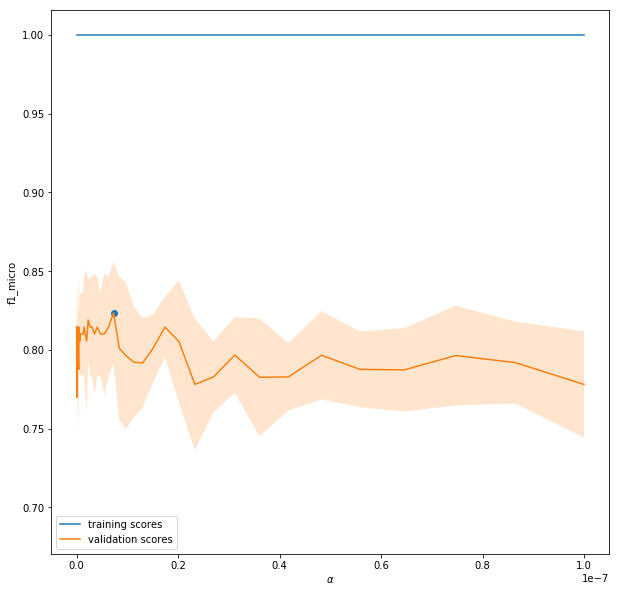

In [183]:
plt.figure(figsize=(10,10))
plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$')
plt.ylabel('f1_micro')
plt.legend();
plt.scatter(best_alpha,val_test.mean(1).max())

## Обучим модель

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=1)

In [186]:
%%time
  model = SGDClassifier(loss='modified_huber', random_state=1, n_jobs=-1,
                          alpha=best_alpha, verbose=False, n_iter=2000).fit(X_train, y_train)
  

CPU times: user 307 ms, sys: 0 ns, total: 307 ms
Wall time: 155 ms


/home/cat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_holdout)
print('Точность (accuracy) - {0:.1%}'.format(accuracy_score(y_holdout, y_pred)))
print(classification_report(y_holdout, y_pred, target_names=lenc.classes_))

Точность (accuracy) - 76.1%
                precision    recall  f1-score   support

    Depression       1.00      0.30      0.47        23
Non-depression       0.73      1.00      0.85        44

     micro avg       0.76      0.76      0.76        67
     macro avg       0.87      0.65      0.66        67
  weighted avg       0.82      0.76      0.72        67



In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = model.predict(X_holdout)
print('Точность (accuracy) - {0:.1%}'.format(accuracy_score(y_holdout, y_pred)))
print(classification_report(y_holdout, y_pred, target_names=lenc.classes_))

Точность (accuracy) - 76.1%
                precision    recall  f1-score   support

    Depression       1.00      0.30      0.47        23
Non-depression       0.73      1.00      0.85        44

     micro avg       0.76      0.76      0.76        67
     macro avg       0.87      0.65      0.66        67
  weighted avg       0.82      0.76      0.72        67



Используем bag-of-words в качестве признаков.

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text_lem']).toarray()
y = data['label'] == 'Depression'

Будем обучать два простых алгоритма: <a href='http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2'>SVM</a> и <a href='https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd'>Random Forest</a>.

In [83]:
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

RANDOM_STATE = 1337

rf_parameters = {
    'n_estimators': (10, 100),
    'max_features': ('sqrt', 'log2', None),
    'max_depth': (None, 3, 10),
    'min_samples_split': (2, 5),
    'min_samples_leaf': (1, 3)
}

svm_parameters = {
    'C': (0.01, 0.1, 1, 10),
}

grid_parameters = {
    'scoring': make_scorer(roc_auc_score),
    'n_jobs': -1,
    'cv': 3,
    'iid': True,
    'return_train_score': True
}

Инициализируем модели и сетки для подбора параметров

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_STATE)
svm = SVC(random_state=RANDOM_STATE, probability=True)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_parameters,
    scoring=make_scorer(roc_auc_score),
    n_jobs=-1,
    cv=3,
    iid=True,
    return_train_score=True
)

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=svm_parameters,
    scoring=make_scorer(roc_auc_score),
    n_jobs=-1,
    cv=3,
    iid=True,
    return_train_score=True
)

Обучаем модели и оцениваем точность

In [85]:
grid_rf.fit(X, y)
grid_svm.fit(X, y)

print('Random Forest ROC AUC score: ', grid_rf.best_score_)
print('SVM ROC AUC score: ', grid_svm.best_score_)

/home/cat/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Random Forest ROC AUC score:  0.6622608907356624
SVM ROC AUC score:  0.7016583902736042
